In [17]:
import glob 
from collections import defaultdict
from util import kitti_label_file_parser, kitti_calib_file_parser
import matplotlib.pyplot as plt
import statistics 
import numpy as np
import sys
sys.path.insert(0, "../kitti/")
from util import  P2_tf


LABEL_DIR = "/home/lab530/KenYu/kitti/training/label_2/"


# Is all calib txt the same? Yes

In [18]:
# # Answer: yes, they are all the same

# import os
# P2 = None 
# for fn in os.listdir("/home/lab530/KenYu/kitti/training/calib/"):
#     if P2 != None: 
#         P2_tmp = kitti_calib_file_parser(f"/home/lab530/KenYu/kitti/training/calib/{fn}")
#         if P2_tmp != P2: 
#             print(P2)
#             print(P2_tmp)
#             P2 = P2_tmp


Number of total ground trues = 51865
Categories: 
Van: 2914
Car: 28742
Misc: 973
DontCare: 11295
Truck: 1094
Pedestrian: 4487
Cyclist: 1627
Tram: 511
Person_sitting: 222
Truncated Objects:
Number of truncated object = 4067, 7.84%
Occluded objects:
1: 8184  (28.47%)
0: 13457  (46.82%)
3: 928  (3.23%)
2: 6173  (21.48%)
Dimension: 
Average height = 1.526
Average width  = 1.629
Average length = 3.884
Average height = 1.71
Mean of y_3d = 1.7097738501148145
Mean of z_3d = 28.01284044255793
Std of y_3d = 0.3857424915081378
Std of z_3d = 16.32088065975966


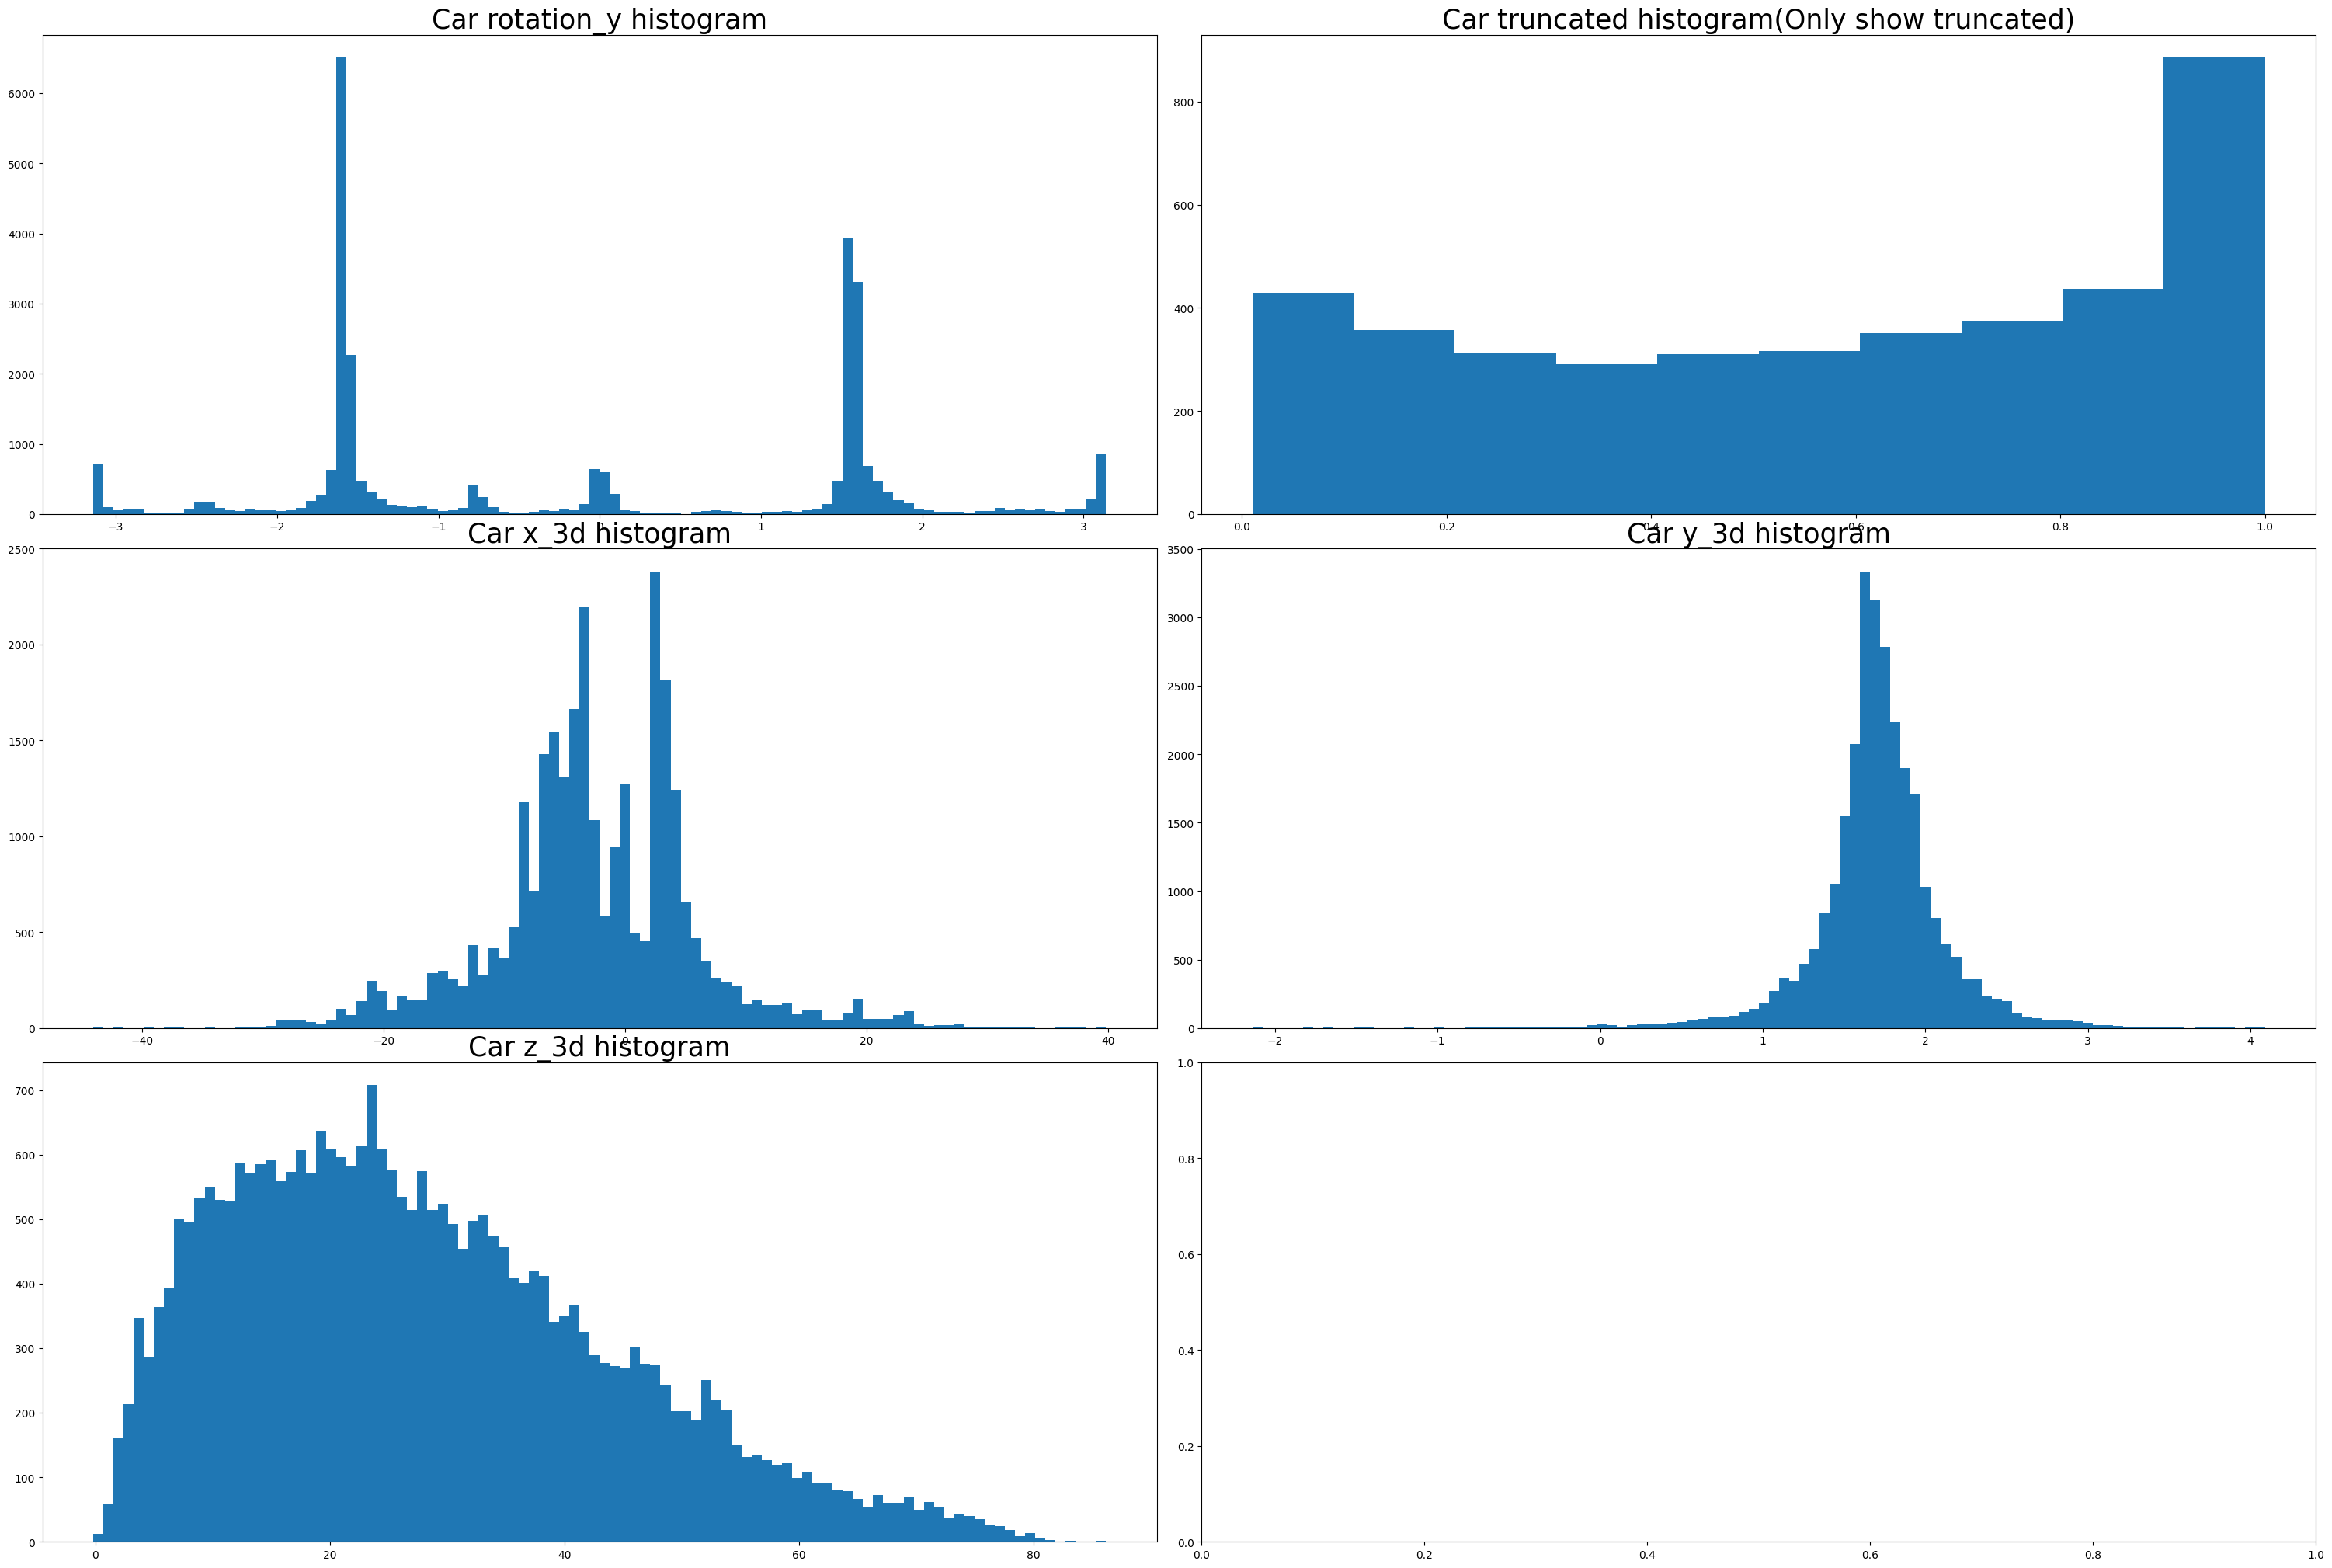

In [19]:
objs = []
for fn in glob.glob(LABEL_DIR + "*.txt"):
    objs += kitti_label_file_parser(fn)
print(f"Number of total ground trues = {len(objs)}")
print("=====================================")

# Show category
print("Categories: ")
cls_dict = defaultdict(int)
for obj in objs:
    cls_dict[obj.category] += 1

for cls in cls_dict:
    print(f"{cls}: {cls_dict[cls]}")
print("=====================================")

# Show truncated objects
print("Truncated Objects:")
N_BIN_TRUNCATED = 10
x_truncated = []
not_truncated_count = 0 
for obj in objs:
    if obj.category == "Car":
        if obj.truncated == 0.0: # Not truncated
            not_truncated_count += 1
        else:
            x_truncated.append(obj.truncated)
print(f"Number of truncated object = {len(x_truncated)}, {round(100*len(x_truncated)/len(objs), 2)}%")

print("=====================================")
print("Occluded objects:")
occ_dict = defaultdict(int)
for obj in objs:
    if obj.category == "Car":
        occ_dict[obj.occluded] += 1
for i in occ_dict:
    print(f"{i}: {occ_dict[i]}  ({round(100*occ_dict[i]/cls_dict['Car'],2)}%)")
print("=====================================")
print("Dimension: ")
avg_h, avg_w, avg_l  = 0, 0, 0

for obj in objs:
    if obj.category == "Car":
        avg_h += obj.h / cls_dict['Car']
        avg_w += obj.w / cls_dict['Car']
        avg_l += obj.l / cls_dict['Car']
print(f"Average height = {round(avg_h, 3)}")
print(f"Average width  = {round(avg_w, 3)}")
print(f"Average length = {round(avg_l, 3)}")

print("=====================================")
avg_y_3d = 0
for obj in objs:
    if obj.category == "Car":
        avg_y_3d += obj.y3d / cls_dict['Car']
print(f"Average height = {round(avg_y_3d, 3)}")

# Show rotation_y histogram
N_BIN_ROTATION_Y = 100
x_rotation_y = []
for obj in objs:
    if obj.category == "Car":
        x_rotation_y.append(obj.rot_y)

# Show x_3d 
N_BIN_X_3D = 100
x_x_3d = []
for obj in objs:
    if obj.category == "Car":
        x_x_3d.append(obj.x3d)

# Show y_3d 
N_BIN_Y_3D = 100
x_y_3d = []
for obj in objs:
    if obj.category == "Car":
        x_y_3d.append(obj.y3d)

# Show z_3d 
N_BIN_Z_3D = 100
x_z_3d = []
for obj in objs:
    if obj.category == "Car":
        x_z_3d.append(obj.z3d)


# Draw histogram
fig, ax = plt.subplots(3, 2, figsize=(30, 20))
fig.set_facecolor('white')
fig.tight_layout()

ax[0, 0].set_title("Car rotation_y histogram", fontsize=25)
ax[0, 0].hist(x_rotation_y, bins=N_BIN_ROTATION_Y)
ax[0, 1].set_title("Car truncated histogram(Only show truncated)", fontsize=25)
ax[0, 1].hist(x_truncated, bins=N_BIN_TRUNCATED)
ax[1, 0].set_title("Car x_3d histogram", fontsize=25)
ax[1, 0].hist(x_x_3d, bins=N_BIN_X_3D)
ax[1, 1].set_title("Car y_3d histogram", fontsize=25)
ax[1, 1].hist(x_y_3d, bins=N_BIN_Y_3D)
ax[2, 0].set_title("Car z_3d histogram", fontsize=25)
ax[2, 0].hist(x_z_3d, bins=N_BIN_Z_3D)

print(f"Mean of y_3d = {statistics.mean(x_y_3d)}")
print(f"Mean of z_3d = {statistics.mean(x_z_3d)}")

print(f"Std of y_3d = {statistics.stdev(x_y_3d)}")
print(f"Std of z_3d = {statistics.stdev(x_z_3d)}")


## Calcualate alpha angle


In [20]:
import math
for obj in objs:
    if obj.category == "Car":
        x_x_3d.append(obj.x3d)
        alpha_my = obj.rot_y + math.atan2(obj.z3d, obj.x3d) - math.pi/2

        # Constraint alpha_my in [-pi, pi]
        if alpha_my > math.pi: alpha_my -= 2*math.pi
        elif alpha_my < -math.pi: alpha_my += 2*math.pi

        if abs(alpha_my - obj.alpha) > 0.3:
            print(obj.alpha)
            print(alpha_my)

-3.14
3.138933319966662
3.14
-3.1404460190377588
-3.14
3.13597033102729
3.13
-3.1377173578538073
-3.07
3.1221185126271536


# Check relationship between u, y, z

In [25]:
P2 = kitti_calib_file_parser(f"/home/lab530/KenYu/kitti/training/calib/000000.txt")
for obj in objs:
    if obj.category == "Car":
        y3d = obj.cz * (obj.cy - P2[1, 2] ) / P2[1, 1] + obj.h/2
        print(f"{y3d}, {obj.y3d}")
        # print(abs(y3d - obj.y3d))

1.5385104248249246, 1.68
2.0317498962450933, 2.23
1.8160081608385235, 1.82
1.7741378584423544, 1.84
1.7614303810429708, 1.99
1.8058570553922717, 2.1
1.7889308099380985, 2.14
0.9630189477808235, 1.6
1.5476901100321663, 1.64
2.3551695559491646, 2.81
2.4407882377016223, 2.88
2.154274236485584, 2.66
1.7661464538825893, 2.03
1.4924306422694524, 1.76
1.605527523915469, 1.63
1.6590632999921866, 1.66
1.6909586543896806, 1.74
1.8215710628879285, 1.96
1.6551436185781752, 1.76
1.6949009650602405, 2.06
1.591586228732801, 2.02
1.450670035194387, 1.72
2.253311766117534, 2.52
1.7953235749121967, 2.48
1.3843262399314535, 1.66
1.4715821978964776, 1.52
1.598783014020614, 1.92
1.2721234642551318, 1.44
1.2421068133653002, 1.48
1.506974176928211, 1.96
1.28255188416871, 1.81
1.240424558676696, 2.01
1.3140793236273172, 1.85
1.458314048136626, 1.94
1.641090669229381, 1.76
1.2885206164763434, 1.61
1.0609877895574844, 1.41
1.5838715813949125, 1.7
1.497897840949939, 1.67
1.4184218694724195, 1.49
1.43395905902907